# Model `BinaryMFThresholdExSigmoidColumnwise`

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

[I] m            : 300
[I] n            : 500
[I] k            : 5
[I] overlap      : [0.5 0.1 0.4 0.1]
[I] seed         : 1714745185


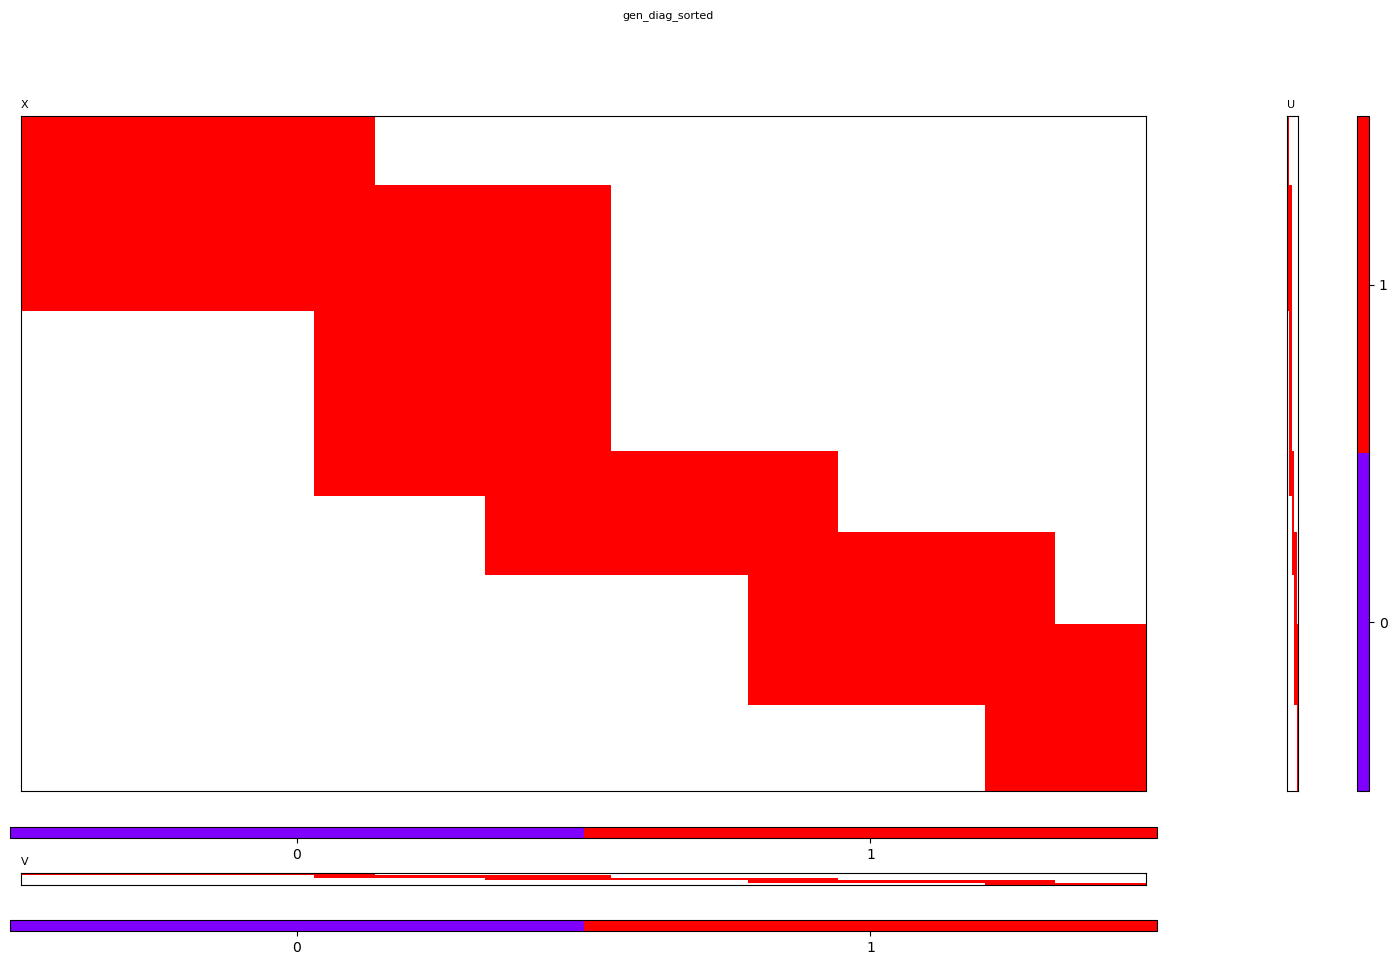

In [2]:
from generators import BlockDiagonalMatrixGenerator

n_row, n_col, k, seed = 300, 500, 5, None

# data = BlockDiagonalMatrixGenerator(m=n_row, n=n_col, k=k, overlap=[0.2, 0.1, 0.2, 0.1])
data = BlockDiagonalMatrixGenerator(m=n_row, n=n_col, k=k, overlap=[0.5, 0.1, 0.4, 0.1])

data.generate(seed=seed) # if no seed assigned, use time instead

data.show_matrix(title="gen_diag_sorted")

In [3]:
# from datasets import MovieLensData

# data = MovieLensData(size="100k")
# data.load()

# idx = data.sample(factor_id=0, n_samples=300, seed=1000)
# idx = data.sample(factor_id=1, n_samples=500, seed=1000)

In [4]:
from datasets import RatioSplit

split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split.negative_sample(
    train_size=split.pos_train_size, 
    val_size=split.pos_val_size, 
    test_size=split.pos_test_size, 
    seed=2023, type='popularity')

[I] RatioSplit, sampling positives
[I]   seed         : 1997
[I]   train_size   : 36260
[I]   val_size     : 5181
[I]   test_size    : 10361
[I]   seed         : 1997
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 98198
[I]   n_negatives  : 51802
[I]   train_size   : 36260
[I]   val_size     : 5181
[I]   test_size    : 10361
[I]   seed         : 2023


# `NMFSklearn` initialization

The thresholding gap can be relatively wide if you init with `NMFSklearn` followed by `BinaryMFPenalty`, as the factors are already (near) binary.

[I] k            : 5
[I] U            : None
[I] V            : None
[I] tol          : 0.0001
[I] max_iter     : 1000
[I] init_method  : nndsvd
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] beta_loss    : frobenius
[I] solver       : cd
[I] task         : reconstruction
[I] Missing validation data.
[W] Missing testing data.


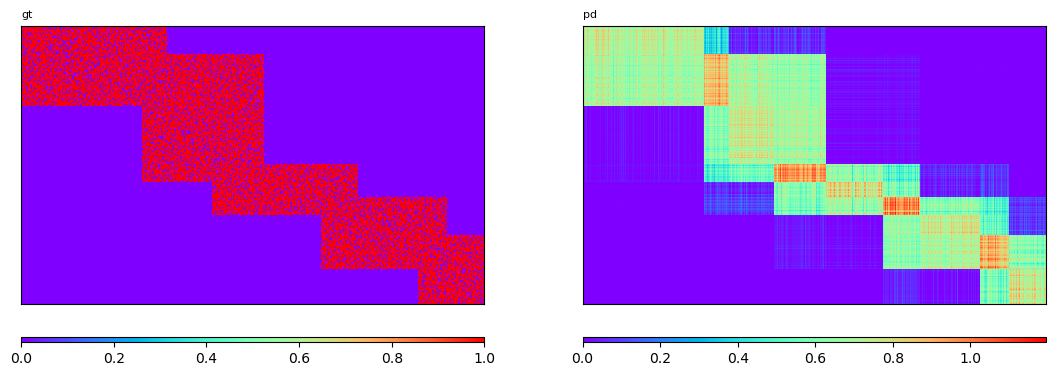

In [5]:
X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

k = 5
reg = 1
reg_growth = 3

from models import NMFSklearn, BinaryMFPenalty

model_nmf = NMFSklearn(k=k, init_method='nndsvd', max_iter=1000, seed=2024)
model_nmf.fit(X_train=X_train, task='reconstruction', verbose=False, display=False)

U, V = model_nmf.U, model_nmf.V

# `BinaryMFPenalty` initialization

In [6]:
# model_bmf = BinaryMFPenalty(k=k, U=U, V=V, reg=reg, reg_growth=reg_growth, init_method='custom', max_iter=100, seed=2024)
# model_bmf.fit(X_train=X_train, X_val=X_val, X_test=X_test, task=task, verbose=False, display=False)

# U, V = model_bmf.U, model_bmf.V

# Shared params

In [7]:
us, vs = 0.1, 0.1
u, v = us, vs

W = 'full'
# W = 'mask'

init_method = 'custom'
link_lamda = 10
task = 'reconstruction'

# `BinaryMFThreshold`

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] min_diff     : 0.001
[I] max_iter     : 100
[I] init_method  : custom
[I] seed         : 1714745187
[I] verbose      : False
[I] display      : False
[I] u            : 0.1
[I] v            : 0.1
[I] lamda        : 100
[I] task         : reconstruction
[I] Normalized U: [0.0, 1.1199181015306918] -> [0.0, 1.0], V: [0.0, 1.1975860422993445] -> [0.0, 1.0]
[I] iter: 1, start: [0.100, 0.100], direction: [22524.130, 69411.891]
[I] iter: 2, start: [0.272, 0.630], direction: [-0.012, 7650.500]
[I] iter: 3, start: [0.272, 0.659], direction: [-0.017, -2238.008]
[I] iter: 4, start: [0.272, 0.650], direction: [-0.016, 879.730]
[I] iter: 5, start: [0.272, 0.654], direction: [-0.016, -383.723]
[I] iter: 6, start: [0.272, 0.652], direction: [-0.016, 169.253]
[W] Stopped in advance: Difference lower than threshold


train  \
                                                                    0   
                time iter         u         v             F    Recall   
0  03/05/24 10:06:27    0  0.100000  0.100000  14383.739347  1.000000   
1  03/05/24 10:06:28    1  0.271845  0.629571   8915.190091  0.926724   
2  03/05/24 10:06:28    2  0.271845  0.658755   8830.654772  0.894870   
3  03/05/24 10:06:28    3  0.271845  0.650218   8824.586356  0.907281   
4  03/05/24 10:06:28    4  0.271845  0.653574   8823.749363  0.902482   
5  03/05/24 10:06:28    5  0.271845  0.652110   8823.592228  0.905433   
6  03/05/24 10:06:29    6  0.271845  0.652755   8823.561729  0.904661   

                                      val                                \
                                        0                                 
  Precision  Accuracy        F1    Recall Precision  Accuracy        F1   
0  0.667145  0.879393  0.800344  1.000000  0.095325  0.672200  0.174058   
1  0.703684  0.887953  0.799948  0.917004  0.099491  0.710453  0.179507   
2  0.705100  0.884113  0.788731  0.879946  0.099068  0.719453  0.178086   
3  0.704394  0.885547  0.793067  0.896931  0.099499  0.716060  0.179127   
4  0.704590  0.884960  0.791352  0.890755  0.099367  0.717367  0.178789   
5  0.704664  0.885407  0.792531  0.893457  0.099354  0.716573  0.178823   
6  0.704592  0.885267  0.792190  0.893457  0.099429  0.716807  0.178944   

       test                                
          0                                
     Recall Precision  Accuracy        F1  
0  1.000000  0.190631  0.706733  0.320219  
1  0.907152  0.196825  0.737893  0.323468  
2  0.869800  0.195832  0.744293  0.319688  
3  0.883988  0.196107  0.741687  0.321002  
4  0.878776  0.196043  0.742700  0.320570  
5  0.881286  0.195982  0.742067  0.320656  
6  0.880610  0.195979  0.742207  0.320607

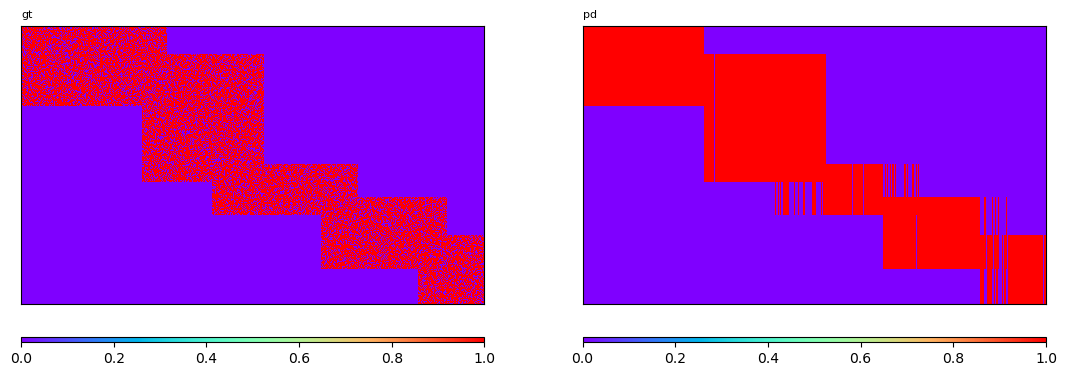

In [8]:
from models import BinaryMFThreshold

model = BinaryMFThreshold(k=k, U=U, V=V, W=W, u=u, v=v)
model.fit(X_train=X_train, X_val=X_val, X_test=X_test, task=task, verbose=False, display=False)

# `BinaryMFThresholdExSigmoid`

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] min_diff     : 0.001
[I] max_iter     : 30
[I] init_method  : custom
[I] seed         : 1714745189
[I] verbose      : False
[I] display      : False
[I] u            : 0.1
[I] v            : 0.1
[I] lamda        : 100
[I] link_lamda   : 10
[I] task         : reconstruction
[I] Normalized U: [0.0, 1.0] -> [0.0, 1.0], V: [0.0, 1.0] -> [0.0, 1.0]
[I] iter: 1, start: [0.100, 0.100], direction: [678.305, 2280.437]
[I] iter: 2, start: [0.266, 0.657], direction: [-0.001, -1132.414]
[I] iter: 3, start: [0.266, 0.380], direction: [0.000, -33.140]
[I] iter: 4, start: [0.266, 0.251], direction: [0.000, 0.073]
[I] iter: 5, start: [0.266, 0.306], direction: [0.000, -43.893]
[I] iter: 6, start: [0.266, 0.284], direction: [0.000, 4.217]
[I] iter: 7, start: [0.266, 0.301], direction: [0.000, -16.325]
[I] iter: 8, start: [0.266, 0.299], direction: [0.000, 4.934]
[W] Stopped in advance: Difference lo

train  \
                                                                   0   
                time iter         u         v            F    Recall   
0  03/05/24 10:06:29    0  0.100000  0.100000  8875.620073  1.000000   
1  03/05/24 10:06:30    1  0.265602  0.656747  8417.424736  0.898069   
2  03/05/24 10:06:30    2  0.265602  0.380279  7691.027911  0.997380   
3  03/05/24 10:06:30    3  0.265602  0.250827  7679.148432  1.000000   
4  03/05/24 10:06:30    4  0.265681  0.305646  7678.996074  0.999448   
5  03/05/24 10:06:31    5  0.265681  0.284214  7678.873238  1.000000   
6  03/05/24 10:06:31    6  0.265682  0.300688  7677.171054  1.000000   
7  03/05/24 10:06:31    7  0.265682  0.298695  7677.066969  1.000000   
8  03/05/24 10:06:32    8  0.265682  0.299297  7677.054162  1.000000   

                                      val                                \
                                        0                                 
  Precision  Accuracy        F1    Recall Precision  Accuracy        F1   
0  0.667145  0.879393  0.800344  1.000000  0.095325  0.672200  0.174058   
1  0.704955  0.884500  0.789880  0.884964  0.099257  0.718640  0.178495   
2  0.700234  0.896153  0.822801  0.995368  0.099851  0.689907  0.181495   
3  0.699973  0.896387  0.823511  1.000000  0.100015  0.689193  0.181844   
4  0.700006  0.896327  0.823346  0.999035  0.099979  0.689333  0.181767   
5  0.699973  0.896387  0.823511  1.000000  0.100015  0.689193  0.181844   
6  0.699973  0.896387  0.823511  1.000000  0.100015  0.689193  0.181844   
7  0.699973  0.896387  0.823511  1.000000  0.100015  0.689193  0.181844   
8  0.699973  0.896387  0.823511  1.000000  0.100015  0.689193  0.181844   

       test                                
          0                                
     Recall Precision  Accuracy        F1  
0  1.000000  0.190631  0.706733  0.320219  
1  0.872889  0.195787  0.743560  0.319836  
2  0.996525  0.199915  0.724280  0.333022  
3  1.000000  0.200012  0.723727  0.333349  
4  0.999421  0.200015  0.723853  0.333323  
5  1.000000  0.200012  0.723727  0.333349  
6  1.000000  0.200012  0.723727  0.333349  
7  1.000000  0.200012  0.723727  0.333349  
8  1.000000  0.200012  0.723727  0.333349

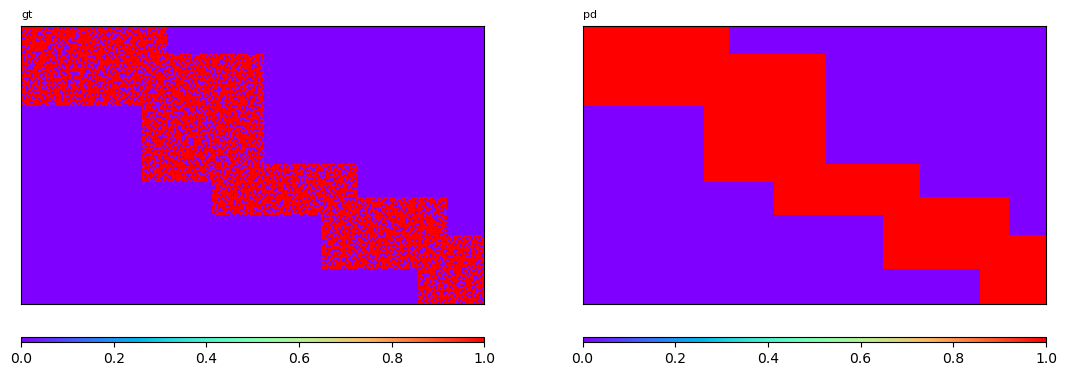

In [9]:
from models import BinaryMFThresholdExSigmoid

model = BinaryMFThresholdExSigmoid(k=k, U=U, V=V, W=W, u=u, v=v, link_lamda=link_lamda)
model.fit(X_train=X_train, X_val=X_val, X_test=X_test, task=task, verbose=False, display=False)

# `BinaryMFThresholdExColumnwise`

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] min_diff     : 0.001
[I] max_iter     : 30
[I] init_method  : custom
[I] seed         : 1714745192
[I] verbose      : False
[I] display      : False
[I] us           : 0.1
[I] vs           : 0.1
[I] lamda        : 10
[I] solver       : line-search
[I] task         : reconstruction
[I] Normalized U: [0.0, 1.0] -> [0.0, 1.0], V: [0.0, 1.0] -> [0.0, 1.0]
[I] iter: 1
[I] iter: 2
[I] iter: 3
[I] iter: 4
[I] iter: 5
[I] iter: 6
[I] iter: 7
[I] iter: 8
[I] iter: 9
[I] iter: 10
[I] iter: 11
[I] iter: 12
[I] iter: 13
[I] iter: 14
[I] iter: 15
[I] iter: 16
[I] iter: 17
[I] iter: 18
[I] iter: 19
[I] iter: 20
[I] iter: 21
[I] iter: 22
[I] iter: 23
[I] iter: 24
[I] iter: 25
[I] iter: 26
[I] iter: 27
[I] iter: 28
[I] iter: 29
[I] iter: 30
[I] iter: 31
[W] Stopped in advance: Reach maximum iteration


\
                                                                                
                 time iter                                                 us   
0   03/05/24 10:06:32    0                          [0.1, 0.1, 0.1, 0.1, 0.1]   
1   03/05/24 10:06:33    1  [0.4010099139392622, 0.49790108056243654, 0.49...   
2   03/05/24 10:06:33    2  [0.501298033873639, 0.5977207610611983, 0.5343...   
3   03/05/24 10:06:33    3  [0.4747364563323352, 0.6076992093365386, 0.550...   
4   03/05/24 10:06:33    4  [0.5601467079590488, 0.6302419328553588, 0.584...   
5   03/05/24 10:06:34    5  [0.5323624133549568, 0.6312160825750563, 0.590...   
6   03/05/24 10:06:34    6  [0.5622413683631442, 0.6362496466701629, 0.597...   
7   03/05/24 10:06:34    7  [0.6138406278782131, 0.663842580900736, 0.6476...   
8   03/05/24 10:06:34    8  [0.6259381640264335, 0.6680179771176921, 0.665...   
9   03/05/24 10:06:35    9  [0.610736193987783, 0.6651389746231284, 0.6716...   
10  03/05/24 10:06:35   10  [0.6192100484073773, 0.6660360309797629, 0.700...   
11  03/05/24 10:06:35   11  [0.6061225147860451, 0.6665574618305568, 0.704...   
12  03/05/24 10:06:35   12  [0.6169828514962563, 0.6694536676508459, 0.727...   
13  03/05/24 10:06:35   13  [0.6047678705385441, 0.6685388396107942, 0.730...   
14  03/05/24 10:06:36   14  [0.617149703489615, 0.6700571243201769, 0.7488...   
15  03/05/24 10:06:36   15  [0.6041621939285975, 0.6695654655200406, 0.748...   
16  03/05/24 10:06:36   16  [0.6189509586145132, 0.6711344474882159, 0.764...   
17  03/05/24 10:06:36   17  [0.6027997633698852, 0.6703258819255756, 0.761...   
18  03/05/24 10:06:37   18  [0.61348502756636, 0.6710994348705379, 0.76988...   
19  03/05/24 10:06:37   19  [0.6040035823997021, 0.6707591824957394, 0.767...   
20  03/05/24 10:06:37   20  [0.6102855538620355, 0.6712829871308316, 0.773...   
21  03/05/24 10:06:37   21  [0.6041546797279579, 0.6710928223666923, 0.770...   
22  03/05/24 10:06:38   22  [0.6082893584237417, 0.6714574371945266, 0.775...   
23  03/05/24 10:06:38   23  [0.6039142920302524, 0.6713439071868468, 0.773...   
24  03/05/24 10:06:38   24  [0.6069742252082895, 0.6716160517384482, 0.777...   
25  03/05/24 10:06:38   25  [0.6035944192676715, 0.6715363025614297, 0.775...   
26  03/05/24 10:06:39   26  [0.6048414577412077, 0.671642397886878, 0.7769...   
27  03/05/24 10:06:39   27  [0.6033355541091532, 0.6716847588962219, 0.776...   
28  03/05/24 10:06:39   28  [0.6043733016865899, 0.6717702791599756, 0.777...   
29  03/05/24 10:06:39   29  [0.6031498543341433, 0.6718013135957186, 0.777...   
30  03/05/24 10:06:40   30  [0.6040549820502411, 0.6718703396103624, 0.778...   
31  03/05/24 10:06:40   31  [0.6030289660551237, 0.6718919530407371, 0.777...   

                                                                        train  \
                                                                            0   
                                                   vs             F    Recall   
0                           [0.1, 0.1, 0.1, 0.1, 0.1]  75031.859090  1.000000   
1   [0.5928818369632317, 0.488721566461372, 0.4973...   7308.435395  0.983039   
2   [0.8237616447235903, 0.6192067173828483, 0.622...   6489.312421  0.789244   
3   [0.6194966725056916, 0.6221326398331338, 0.637...   6205.647911  0.945394   
4   [0.7607919770414562, 0.6261902424683456, 0.714...   6104.071705  0.871291   
5   [0.6529473845956871, 0.6187277072668628, 0.707...   5995.827038  0.934915   
6   [0.6862052276111211, 0.6154302622695328, 0.711...   5957.626017  0.921180   
7   [0.6399273067725335, 0.5845591878160442, 0.686...   5935.528310  0.937231   
8   [0.6552782578833158, 0.5831480665576051, 0.685...   5927.602287  0.923993   
9   [0.6459383016244156, 0.5802028401428708, 0.678...   5919.589464  0.932405   
10  [0.6649887079391026, 0.5757627634642403, 0.659...   5912.420912  0.924214   
11  [0.6534008332830955, 0.5751062998380947, 0.650...   5905.466099  0.934115   
12  [0.6687933790547077, 0.5

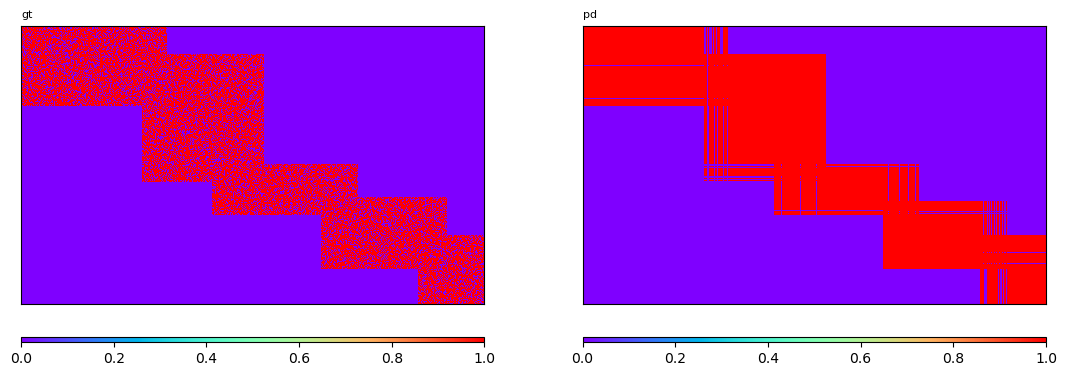

In [10]:
from models import BinaryMFThresholdExColumnwise

solver = 'line-search'
lamda = 10

model = BinaryMFThresholdExColumnwise(k=k, U=U, V=V, W=W, us=us, vs=vs, solver=solver, lamda=lamda)
model.fit(X_train=X_train, X_val=X_val, X_test=X_test, task=task, verbose=False, display=False)

# `BinaryMFThresholdExSigmoidColumnwise`

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] min_diff     : 0.001
[I] max_iter     : 30
[I] init_method  : custom
[I] seed         : 1714745345
[I] verbose      : False
[I] display      : False
[I] lamda        : 100
[I] lamda_rate   : 1.0
[I] link_lamda   : 10
[I] us           : 0.1
[I] vs           : 0.1
[I] task         : reconstruction
[I] Normalized U: [0.0, 1.0] -> [0.0, 1.0], V: [0.0, 1.0] -> [0.0, 1.0]
[I] iter: 1
[I] iter: 2
[I] iter: 3
[I] iter: 4
[I] iter: 5
[I] iter: 6
[I] iter: 7
[W] Stopped in advance: Difference lower than threshold


\
                                                                               
                time iter                                                 us   
0  03/05/24 10:09:05    0                          [0.1, 0.1, 0.1, 0.1, 0.1]   
1  03/05/24 10:09:05    1  [0.38060486706914576, 0.11393927411060654, 0.1...   
2  03/05/24 10:09:05    2  [0.3806049148074019, 0.11412956807851043, 0.10...   
3  03/05/24 10:09:05    3  [0.3806051972802716, 0.11524788354300823, 0.10...   
4  03/05/24 10:09:05    4  [0.38060520639274276, 0.11528128247758532, 0.1...   
5  03/05/24 10:09:06    5  [0.3806052144100632, 0.11531065442795498, 0.10...   
6  03/05/24 10:09:06    6  [0.38060521799006725, 0.11532369255851045, 0.1...   
7  03/05/24 10:09:06    7  [0.38060522494410004, 0.11534903017433518, 0.1...   

                                                                          \
                                                                           
                                                  vs  lamda            F   
0                          [0.1, 0.1, 0.1, 0.1, 0.1]  100.0  8875.620073   
1  [0.10228589765933635, 0.6008137070199204, 0.80...  100.0  8149.478002   
2  [0.09508935430161453, 0.573981071411115, 0.304...  100.0  7730.101681   
3  [0.10786290665740526, 0.4871925661161441, 0.17...  100.0  7674.747906   
4  [0.10800408552494249, 0.4805407130231598, 0.18...  100.0  7669.622355   
5  [0.10812675966426488, 0.4883468403010758, 0.18...  100.0  7669.064672   
6  [0.10818095512603278, 0.48444289804018087, 0.1...  100.0  7667.244819   
7  [0.10828573129190222, 0.48538537649674934, 0.1...  100.0  7667.242924   

      train                                     val                      \
          0                                       0                       
     Recall Precision  Accuracy        F1    Recall Precision  Accuracy   
0  1.000000  0.667145  0.879393  0.800344  1.000000  0.095325  0.672200   
1  0.925483  0.704896  0.888327  0.800267  0.907547  0.098767  0.710773   
2  0.991092  0.700813  0.895567  0.821051  0.986489  0.099670  0.691747   
3  0.998649  0.699716  0.896073  0.822874  0.998263  0.099940  0.689413   
4  1.000000  0.699973  0.896387  0.823511  1.000000  0.100015  0.689193   
5  0.997932  0.700188  0.896207  0.822957  0.997491  0.100002  0.689840   
6  0.999338  0.700064  0.896340  0.823349  0.998842  0.099979  0.689387   
7  0.998649  0.700135  0.896280  0.823164  0.998263  0.100000  0.689620   

                 test                                
                    0                                
         F1    Recall Precision  Accuracy        F1  
0  0.174058  1.000000  0.190631  0.706733  0.320219  
1  0.178147  0.902133  0.196337  0.738173  0.322488  
2  0.181049  0.987453  0.199516  0.725480  0.331960  
3  0.181690  0.997684  0.199745  0.723747  0.332850  
4  0.181844  1.000000  0.200012  0.723727  0.333349  
5  0.181780  0.996622  0.199810  0.724080  0.332882  
6  0.181764  0.998938  0.199957  0.723853  0.333215  
7  0.181789  0.997684  0.199865  0.723953  0.333017

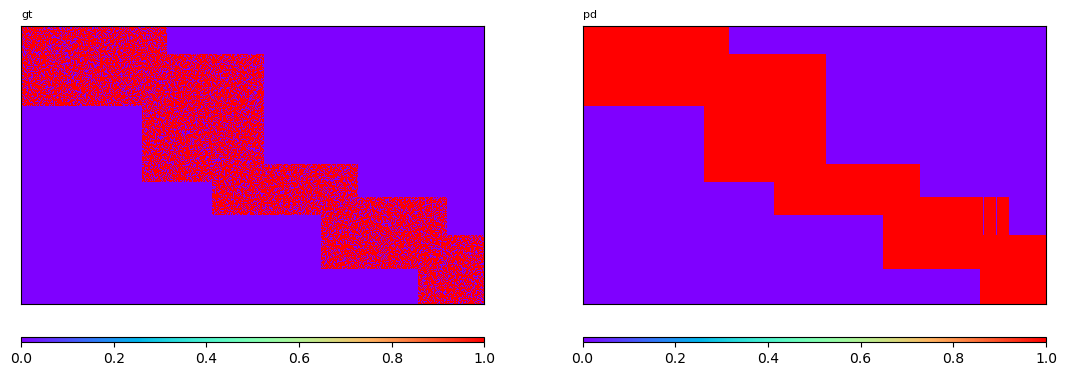

In [18]:
from models import BinaryMFThresholdExSigmoidColumnwise

lamda = 100
lamda_rate = 1.0

model = BinaryMFThresholdExSigmoidColumnwise(k=k, U=U, V=V, W=W, us=us, vs=vs, lamda=lamda, lamda_rate=lamda_rate, link_lamda=link_lamda)
model.fit(X_train=X_train, X_val=X_val, X_test=X_test, task=task, verbose=False, display=False)

# `BinaryMFThresholdExColumnwiseLamda`

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] min_diff     : 0.001
[I] max_iter     : 30
[I] init_method  : custom
[I] seed         : 1714743397
[I] verbose      : False
[I] display      : False
[I] us           : 0.1
[I] vs           : 0.1
[I] u_lamda      : 10
[I] v_lamda      : 10
[I] solver       : line-search
[I] task         : reconstruction
[I] Normalized U: [0.0, 1.0] -> [0.0, 1.0], V: [0.0, 1.0] -> [0.0, 1.0]
[I] iter: 1
[I] iter: 2
[I] iter: 3
[I] iter: 4
[I] iter: 5
[I] iter: 6
[I] iter: 7
[I] iter: 8
[I] iter: 9
[I] iter: 10
[I] iter: 11
[I] iter: 12
[I] iter: 13
[I] iter: 14
[I] iter: 15
[I] iter: 16
[I] iter: 17
[I] iter: 18
[I] iter: 19
[I] iter: 20
[W] Stopped in advance: Difference lower than threshold


\
                                                                                
                 time iter                                                 us   
0   03/05/24 09:36:37    0                          [0.1, 0.1, 0.1, 0.1, 0.1]   
1   03/05/24 09:36:37    1  [0.4414360021208653, 0.4342642546611435, 0.542...   
2   03/05/24 09:36:37    2  [0.5095965012263541, 0.5245634429776374, 0.629...   
3   03/05/24 09:36:38    3  [0.5742202030311157, 0.5054941707451156, 0.648...   
4   03/05/24 09:36:38    4  [0.5654427409680906, 0.5317216917109789, 0.653...   
5   03/05/24 09:36:38    5  [0.580068393401312, 0.5441139786774938, 0.6559...   
6   03/05/24 09:36:38    6  [0.583665519247095, 0.5619213535474499, 0.6580...   
7   03/05/24 09:36:38    7  [0.5937068872041602, 0.5674378890352476, 0.657...   
8   03/05/24 09:36:39    8  [0.5975820815833168, 0.577323905047665, 0.6565...   
9   03/05/24 09:36:39    9  [0.6049893835211688, 0.580382383173088, 0.6558...   
10  03/05/24 09:36:39   10  [0.6086532144071516, 0.5855191575446858, 0.654...   
11  03/05/24 09:36:39   11  [0.6138766487146712, 0.5871344562536848, 0.653...   
12  03/05/24 09:36:40   12  [0.6204206096700707, 0.592628502696526, 0.6515...   
13  03/05/24 09:36:40   13  [0.6258798251611859, 0.5930033733082838, 0.651...   
14  03/05/24 09:36:40   14  [0.6265671288072525, 0.5938411385026476, 0.650...   
15  03/05/24 09:36:40   15  [0.6295378818971414, 0.5941565217612839, 0.650...   
16  03/05/24 09:36:41   16  [0.630580826811433, 0.5946740136344574, 0.6498...   
17  03/05/24 09:36:41   17  [0.6322709651869977, 0.5948615264312399, 0.649...   
18  03/05/24 09:36:41   18  [0.6343206060494319, 0.595491917570722, 0.6489...   
19  03/05/24 09:36:41   19  [0.6358009028731363, 0.5955619838883238, 0.648...   
20  03/05/24 09:36:42   20  [0.635926651633981, 0.595619847102157, 0.64869...   

                                                                             \
                                                                              
                                                   vs    u_lamda    v_lamda   
0                           [0.1, 0.1, 0.1, 0.1, 0.1]  10.000000  10.000000   
1   [0.4972621437255923, 0.5305013963145349, 0.449...   9.997357   9.996154   
2   [0.6061538006057259, 0.698882899651513, 0.5463...   9.998797   9.997852   
3   [0.757629240936997, 0.5757449516052906, 0.5664...   9.998828   9.998303   
4   [0.6941378804227558, 0.5984696857930338, 0.579...   9.999219   9.998693   
5   [0.7261053494085297, 0.5943734876199114, 0.587...   9.999427   9.998938   
6   [0.7034474265402165, 0.5790118834775622, 0.596...   9.999769   9.999374   
7   [0.7199708503593861, 0.5718617771940147, 0.598...   9.999917   9.999571   
8   [0.7047097718020374, 0.5602861668965716, 0.601...  10.000209   9.999956   
9   [0.7143898365965807, 0.5559297708342409, 0.602...  10.000348  10.000138   
10  [0.704515635990869, 0.5485352289455578, 0.6037...  10.000620  10.000492   
11  [0.709784157246125, 0.5458389620200477, 0.6042...  10.000752  10.000662   
12  [0.6973903977111038, 0.5366937720220971, 0.605...  10.001275  10.001329   
13  [0.7050660158897187, 0.5356210733710205, 0.606...  10.001402  10.001485   
14  [0.698990919287055, 0.5339204990418882, 0.6065...  10.001656  10.001796   
15  [0.702223788082814, 0.5333171967156974, 0.6067...  10.001782  10.001950   
16  [0.69904982710423, 0.5322608864248907, 0.60714...  10.002035  10.002254   
17  [0.7003565690944363, 0.53187919381375, 0.60731...  10.002162  10.002405   
18  [0.6969071496130191, 0.5305513182989956, 0.607...  10.002668  10.003007   
19  [0.6986573497909893, 0.5303998624664614, 0.608...  10.002795  10.003156   
20  [0.6979082452861088, 0.5302673835980152, 0.608...  10.002922  10.003304   

                     train                                     val            \
                         0                                       0             
               F    Recall Precision  Accuracy        F1    Recall Precision 

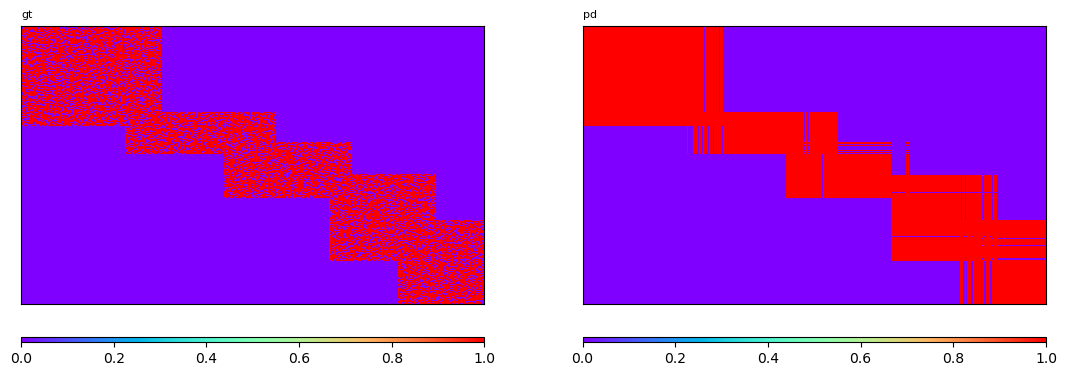

In [24]:
# from models import BinaryMFThresholdExColumnwiseLamda

# solver = 'line-search'
# u_lamda, v_lamda = 10, 10

# model = BinaryMFThresholdExColumnwiseLamda(k=k, U=U, V=V, W=W, us=us, vs=vs, u_lamda=u_lamda, v_lamda=v_lamda, solver=solver)
# model.fit(X_train=X_train, X_val=X_val, X_test=X_test, task=task, verbose=False, display=False)